# COVID-19 Data Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Load data
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/" \
                "csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df_confirmed = pd.read_csv(url_confirmed)

In [12]:
# Extract unique country names
available_countries = sorted(df_confirmed["Country/Region"].unique())

# Print the list nicely
print("Available countries in the dataset:\n")
for c in available_countries:
    print("-", c)

print("\nPlease choose one of the countries above for analysis.")


Available countries in the dataset:

- Afghanistan
- Albania
- Algeria
- Andorra
- Angola
- Antarctica
- Antigua and Barbuda
- Argentina
- Armenia
- Australia
- Austria
- Azerbaijan
- Bahamas
- Bahrain
- Bangladesh
- Barbados
- Belarus
- Belgium
- Belize
- Benin
- Bhutan
- Bolivia
- Bosnia and Herzegovina
- Botswana
- Brazil
- Brunei
- Bulgaria
- Burkina Faso
- Burma
- Burundi
- Cabo Verde
- Cambodia
- Cameroon
- Canada
- Central African Republic
- Chad
- Chile
- China
- Colombia
- Comoros
- Congo (Brazzaville)
- Congo (Kinshasa)
- Costa Rica
- Cote d'Ivoire
- Croatia
- Cuba
- Cyprus
- Czechia
- Denmark
- Diamond Princess
- Djibouti
- Dominica
- Dominican Republic
- Ecuador
- Egypt
- El Salvador
- Equatorial Guinea
- Eritrea
- Estonia
- Eswatini
- Ethiopia
- Fiji
- Finland
- France
- Gabon
- Gambia
- Georgia
- Germany
- Ghana
- Greece
- Grenada
- Guatemala
- Guinea
- Guinea-Bissau
- Guyana
- Haiti
- Holy See
- Honduras
- Hungary
- Iceland
- India
- Indonesia
- Iran
- Iraq
- Ireland
- I

In [13]:
# Select country
country = "Japan"
df_country = df_confirmed[df_confirmed["Country/Region"] == country]

In [16]:
#Proccessing the data of the selected contry for plotting
# Drop non-date columns
df_country = df_country.drop(columns=["Province/State", "Lat", "Long"], errors="ignore")

# Sum in case of multiple regions
df_country = df_country.groupby("Country/Region").sum()

# Transpose so dates become index
cases_ts = df_country.T
deaths_ts = df_country.T

# Convert index to datetime
cases_ts.index = pd.to_datetime(cases_ts.index, format='%m/%d/%y')
deaths_ts.index = pd.to_datetime(deaths_ts.index, format='%m/%d/%y')

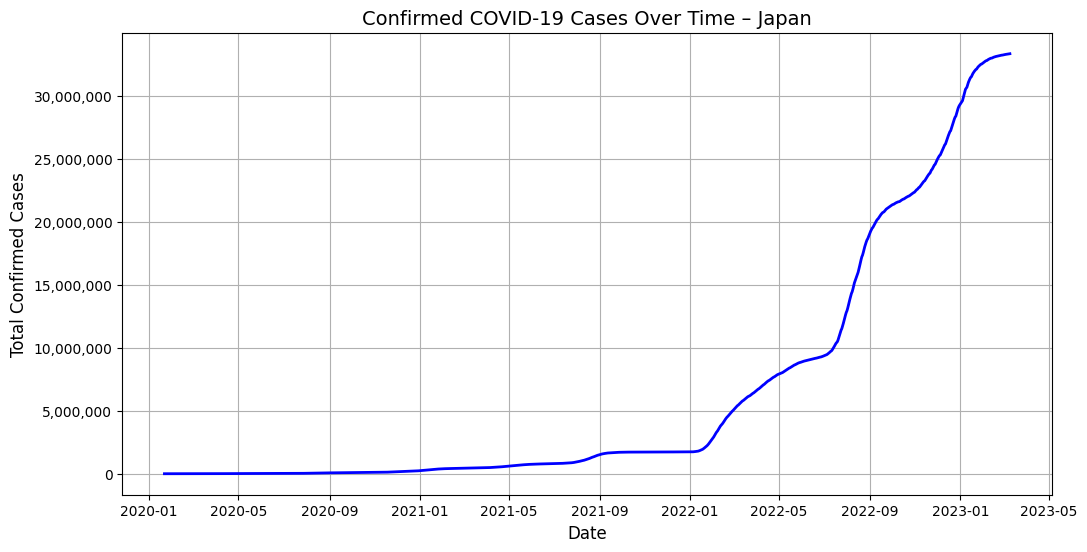

In [17]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(cases_ts.index, cases_ts[country], color='blue', linewidth=2)

plt.title(f"Confirmed COVID-19 Cases Over Time – {country}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Confirmed Cases", fontsize=12)
plt.grid(True)

# Format y-axis numbers with commas
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

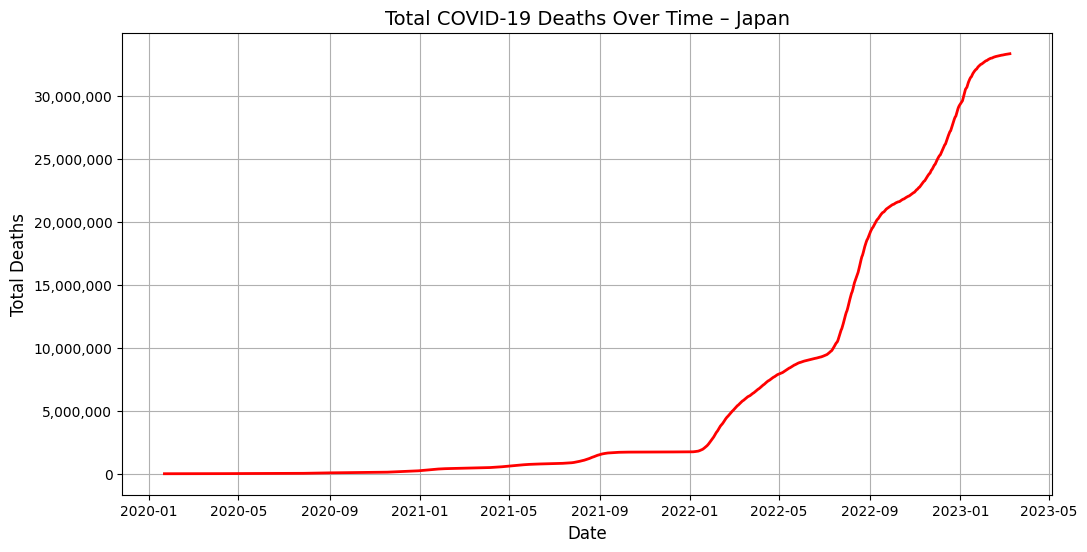

In [18]:
# Plot total deaths over time
plt.figure(figsize=(12,6))
plt.plot(deaths_ts.index, deaths_ts[country], color='red', linewidth=2)

plt.title(f"Total COVID-19 Deaths Over Time – {country}", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)
plt.grid(True)

# Format y-axis numbers with commas
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


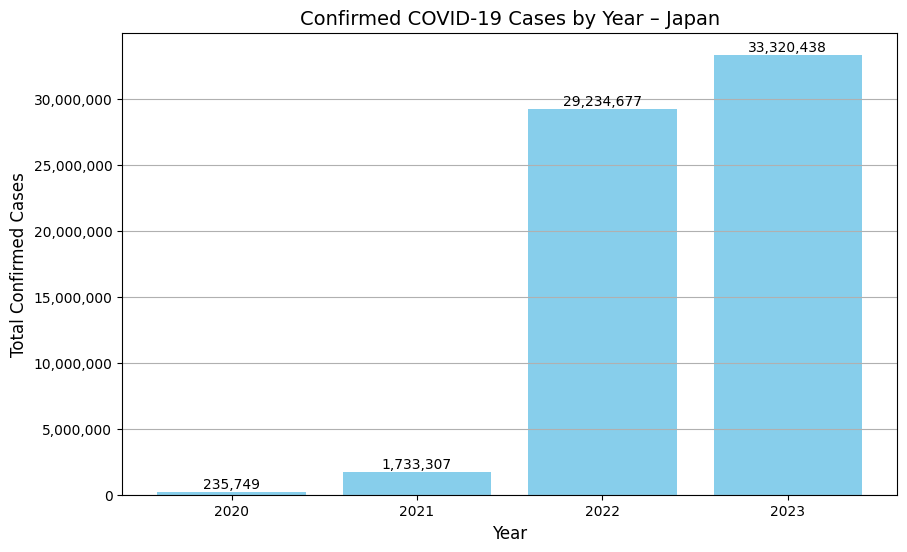

In [19]:

# Group by year and take the last cumulative value of each year
annual_cumulative = cases_ts.groupby(cases_ts.index.year)[country].max()

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(annual_cumulative.index.astype(str), annual_cumulative.values, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.title(f"Confirmed COVID-19 Cases by Year – {country}", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Confirmed Cases", fontsize=12)
plt.grid(axis='y')

# Format y-axis numbers with commas
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


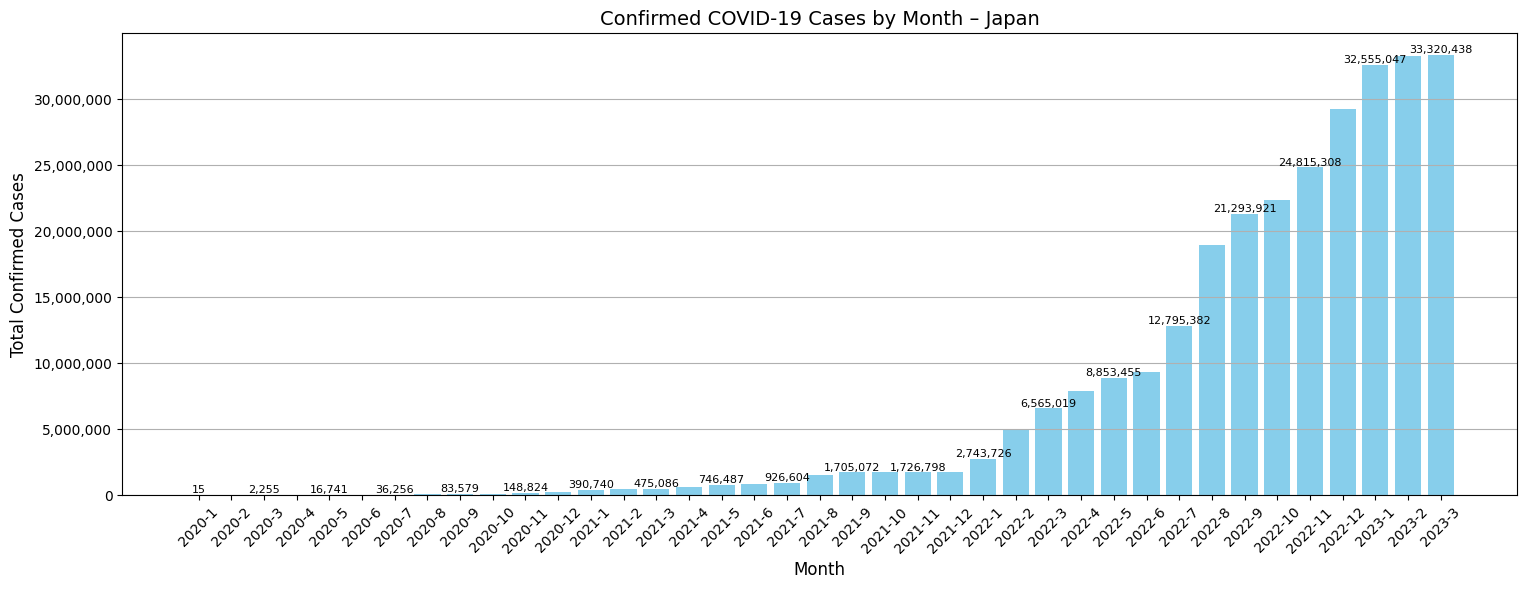

In [20]:

# Resample by month, taking the last cumulative value of each month
monthly_cumulative = cases_ts.resample('ME').last()[country]

# Create labels like "2020-1", "2020-5", etc.
labels = [f"{d.year}-{d.month}" for d in monthly_cumulative.index]

# Plot
plt.figure(figsize=(18,6))
bars = plt.bar(labels, monthly_cumulative.values, color='skyblue')

# Add value labels on top of each bar
for bar in bars[::2]:  # optional: show every 2nd label to reduce clutter
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=8)

plt.title(f"Confirmed COVID-19 Cases by Month – {country}", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Confirmed Cases", fontsize=12)
plt.xticks(rotation=45)  # rotate labels for readability
plt.grid(axis='y')

# Format y-axis numbers with commas
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


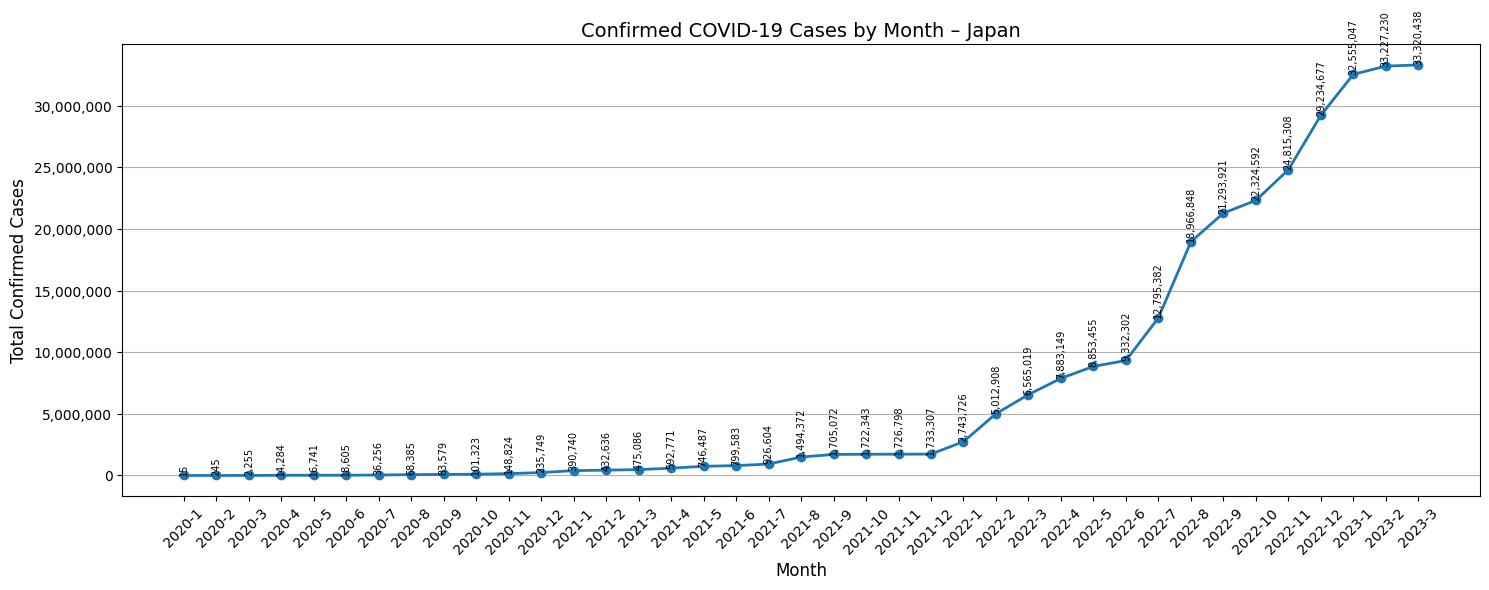

In [21]:


# Monthly cumulative cases
monthly_cumulative = cases_ts.resample("ME").last()[country]

# Labels like "2020-1"
labels = [f"{d.year}-{d.month}" for d in monthly_cumulative.index]

# Plot
plt.figure(figsize=(15,6))
plt.plot(labels, monthly_cumulative.values, marker='o', linestyle='-', linewidth=2)

# Add vertical numbers **with extra spacing**
for i, value in enumerate(monthly_cumulative.values):
    plt.text(i, value + 5000,      # <-- pushes the text upward by 5000
             f'{int(value):,}',
             fontsize=7, ha='center', va='bottom', rotation=90)

plt.title(f"Confirmed COVID-19 Cases by Month – {country}", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Confirmed Cases", fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis='y')

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()




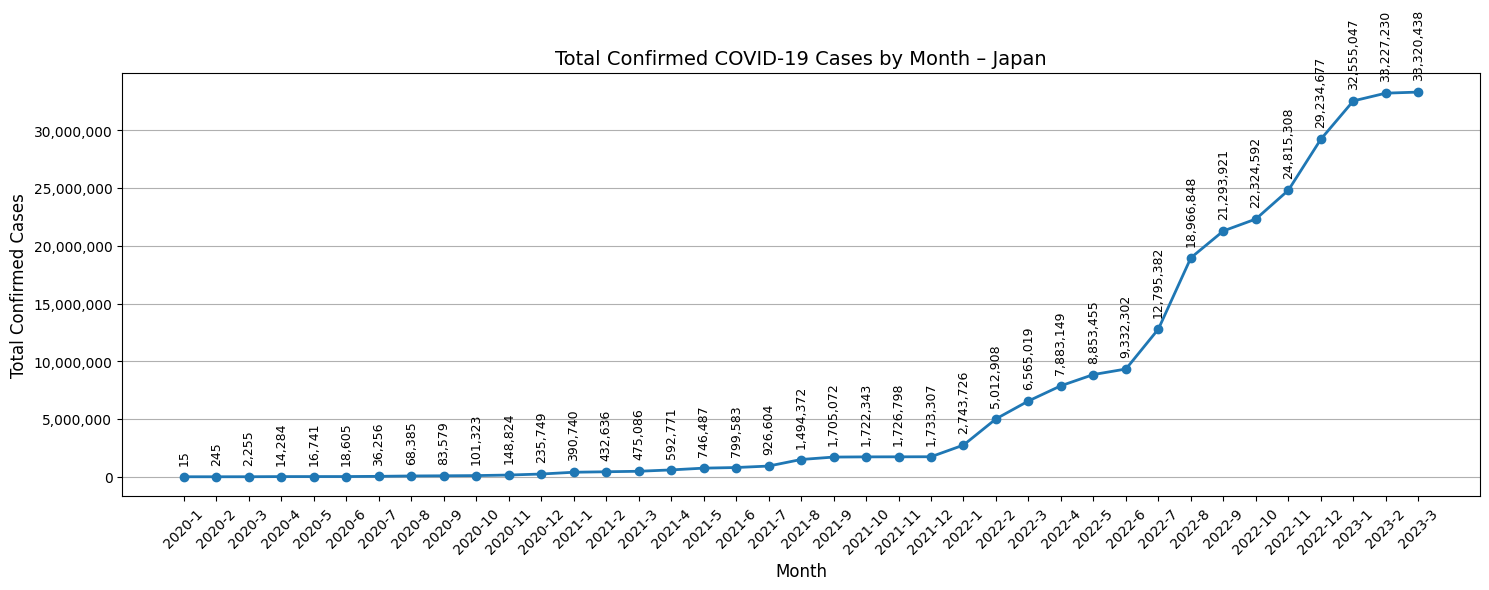

In [22]:


# Monthly cumulative numbers
monthly_cumulative = cases_ts.resample('ME').last()[country]

# Labels
labels = [f"{d.year}-{d.month}" for d in monthly_cumulative.index]

plt.figure(figsize=(15,6))
plt.plot(labels, monthly_cumulative.values, marker='o', linewidth=2)

# Calculate a larger offset for labels
offset = monthly_cumulative.max() * 0.03   # 3% of max value

# Add labels with extra spacing
for x, y in zip(labels, monthly_cumulative.values):
    plt.text(x, y + offset, f"{int(y):,}", ha='center', va='bottom', rotation=90, fontsize=9)

plt.title(f"Total Confirmed COVID-19 Cases by Month – {country}", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Confirmed Cases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


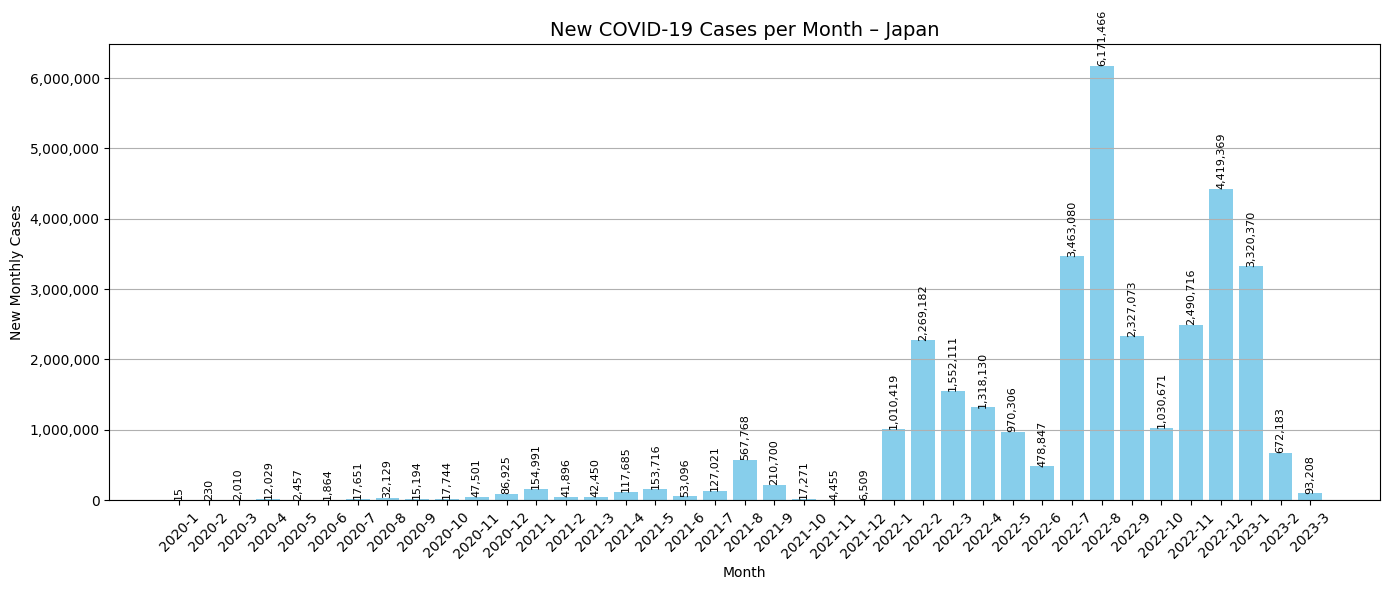

In [23]:


# Monthly cumulative (month-end)
monthly_cumulative = cases_ts.resample("ME").last()[country]

# NEW cases per month = month_end - previous_month_end
monthly_new_cases = monthly_cumulative.diff().fillna(monthly_cumulative)

# Create labels like "2020-1", "2020-2", ...
labels = [f"{d.year}-{d.month}" for d in monthly_new_cases.index]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(labels, monthly_new_cases.values, color='skyblue')

# Add value labels on each bar
for i, val in enumerate(monthly_new_cases.values):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.title(f"New COVID-19 Cases per Month – {country}", fontsize=14)
plt.xlabel("Month")
plt.ylabel("New Monthly Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()


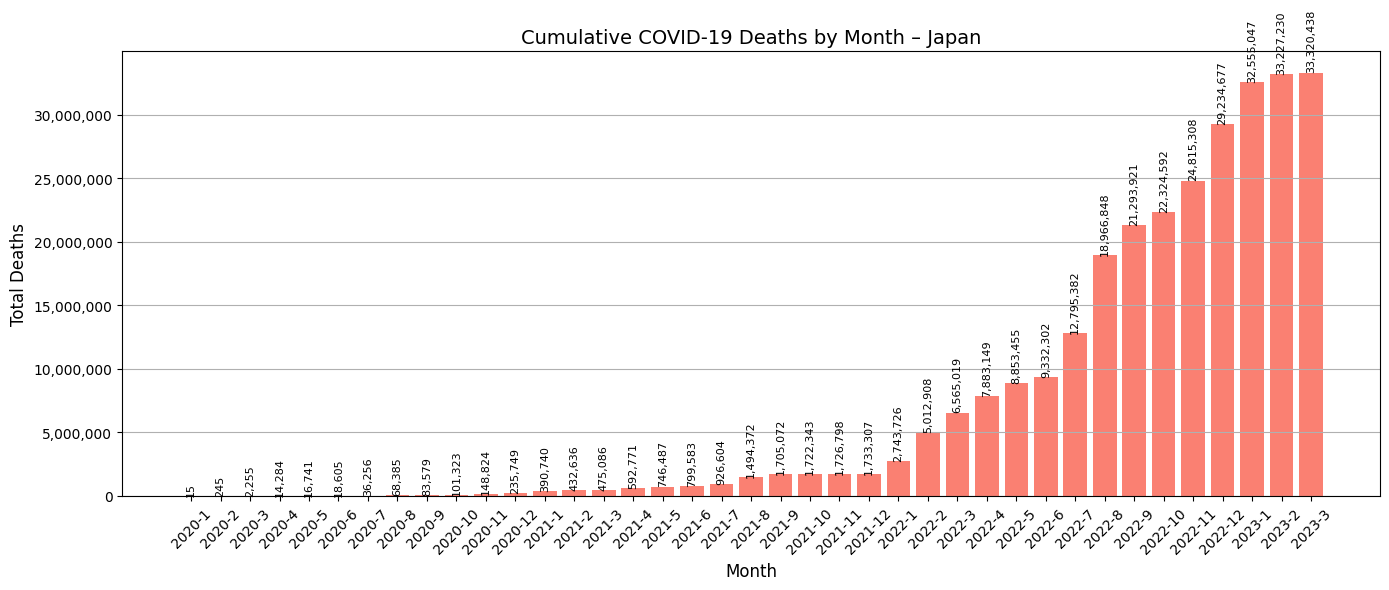

In [24]:


# Resample by month-end, taking the last cumulative value of each month
monthly_cumulative_deaths = deaths_ts.resample('ME').last()[country]

# Labels for each month
labels = [f"{d.year}-{d.month}" for d in monthly_cumulative_deaths.index]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(labels, monthly_cumulative_deaths.values, color='salmon')

# Add value labels on top of each bar
for i, val in enumerate(monthly_cumulative_deaths.values):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.title(f"Cumulative COVID-19 Deaths by Month – {country}", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Format y-axis numbers with commas
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()



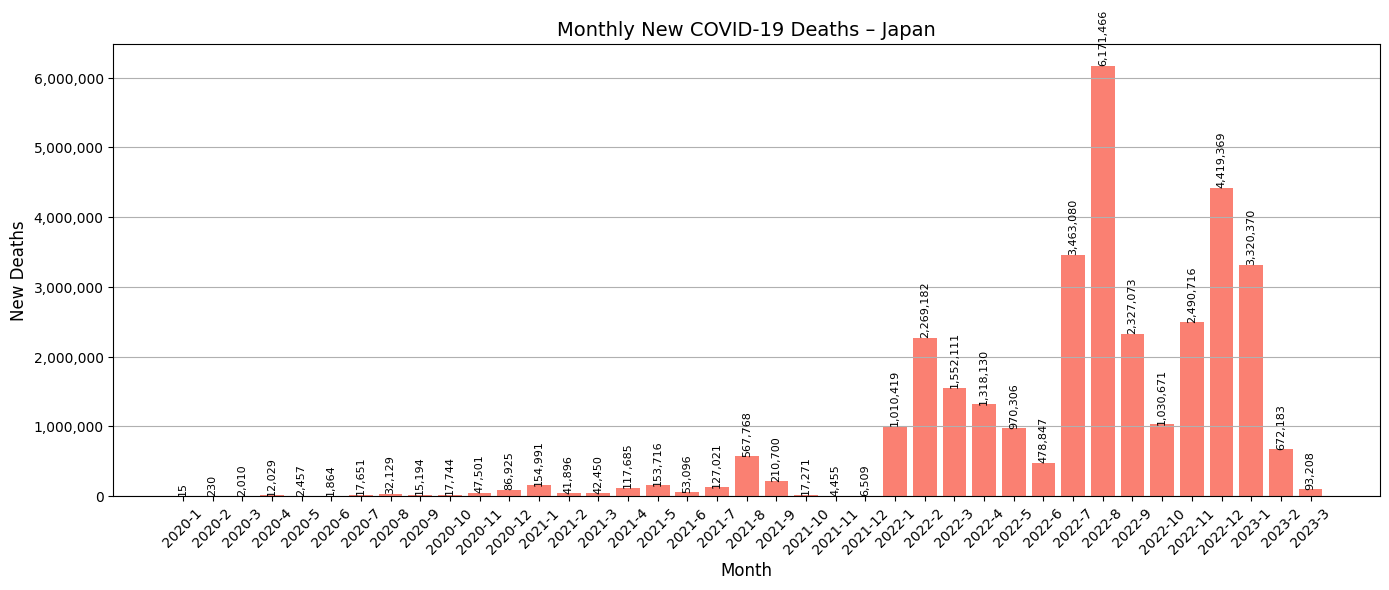

In [25]:


# Calculate monthly new deaths
monthly_cumulative_deaths = deaths_ts.resample('ME').last()[country]
monthly_new_deaths = monthly_cumulative_deaths.diff().fillna(monthly_cumulative_deaths.iloc[0])

# Labels for each month
labels = [f"{d.year}-{d.month}" for d in monthly_new_deaths.index]

# Plot
plt.figure(figsize=(14,6))
plt.bar(labels, monthly_new_deaths.values, color='salmon')

# Add value labels
for i, val in enumerate(monthly_new_deaths.values):
    if val > 0:  # only label months with deaths
        plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=8, rotation=90)

plt.title(f"Monthly New COVID-19 Deaths – {country}", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("New Deaths", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Format y-axis numbers with commas
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()
